In [46]:
# Feb 18 2019
# Shaojun Yu
# Python 3.7
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas
from sklearn.linear_model import LinearRegression

In [47]:
x = np.arange(1,16,1)
y = [math.cos(i) for i in x]

# new basis for cubic spline
x_new = [[1, i, i**2, i**3, (i-5)**3, (i-10)**3] for i in x]

### new data matrix with cubic basis

In [48]:
# new data matrix
new_matrix = pandas.DataFrame(x_new, columns=['x0','x1','x2','x3','x4','x5'])
new_matrix['y'] = y
new_matrix = new_matrix.where(new_matrix > 0, 0)
new_matrix

,x0,x1,x2,x3,x4,x5,y
0,1,1,1,1,0,0,0.540302
1,1,2,4,8,0,0,0.000000
2,1,3,9,27,0,0,0.000000
3,1,4,16,64,0,0,0.000000
4,1,5,25,125,0,0,0.283662
5,1,6,36,216,1,0,0.960170
6,1,7,49,343,8,0,0.753902
7,1,8,64,512,27,0,0.000000
8,1,9,81,729,64,0,0.000000
9,1,10,100,1000,125,0,0.000000


### Fit simple linear model

In [65]:
X = new_matrix.drop(columns=['y'])
X1,y1 = X.iloc[range(5),],y[0:5]
X2,y2 = X.iloc[range(5,10),],y[5:10]
X3,y3 = X.iloc[range(10,15),],y[10:15]
m1 = LinearRegression().fit(X1,y1)
m2 = LinearRegression().fit(X2,y2)
m3 = LinearRegression().fit(X3,y3)

### Plot

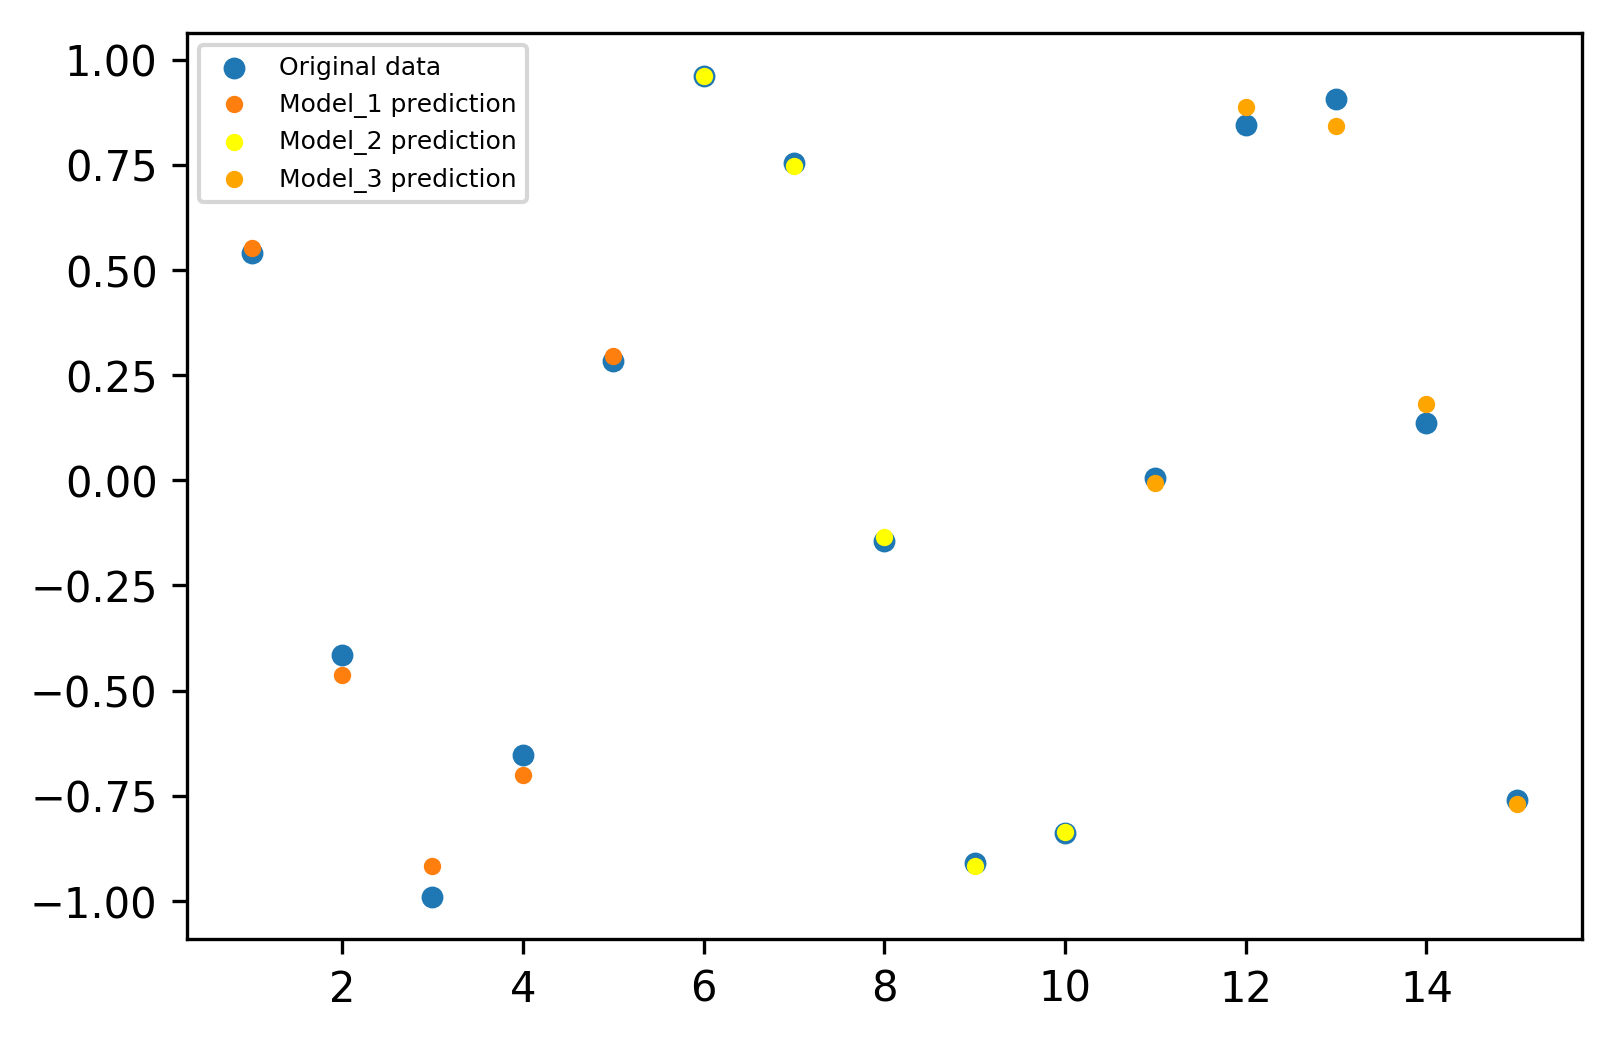

In [99]:
fig = plt.figure(dpi=300)
plt.scatter(x,y, s=18,label="Original data")
plt.scatter(range(1,6), m1.predict(X1), s=10, label="Model_1 prediction")
plt.scatter(range(6,11), m2.predict(X2), s=10, c="yellow", label="Model_2 prediction")
plt.scatter(range(11,16), m3.predict(X3), s=10, c="orange", label="Model_3 prediction")
plt.legend(prop={'size': 6})
plt.show()